In [1]:
import pandas as pd
import numpy as np

In [19]:
data = pd.read_csv('/content/Lab3.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# **Анализ и предобработка**

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Первые строки данных:")
print(data.head())

print("\nИнформация о типах данных и пропусках:")
print(data.info())

print("\nСтатистика по числовым признакам:")
print(data.describe())

print("\nПропуски в данных:")
print(data.isna().sum())

print("\nКоличество дубликатов:")
print(data.duplicated().sum())



Первые строки данных:
               country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1              Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2              Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3               Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4  Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   

   inflation  life_expec  total_fer      gdpp  cluster  cluster_kmeans  \
0   0.157336   -1.619092   1.902882 -0.679180        2               1   
1  -0.312347    0.647866  -0.859973 -0.485623        3               0   
2   0.789274    0.670423  -0.038404 -0.465376        3               0   
3   1.387054   -1.179234   2.128151 -0.516268        3               1   
4  -0.601749    0.704258  -0.541946 -0.041817        3               0   

   cluster_db  
0           0  
1           0  
2           0  


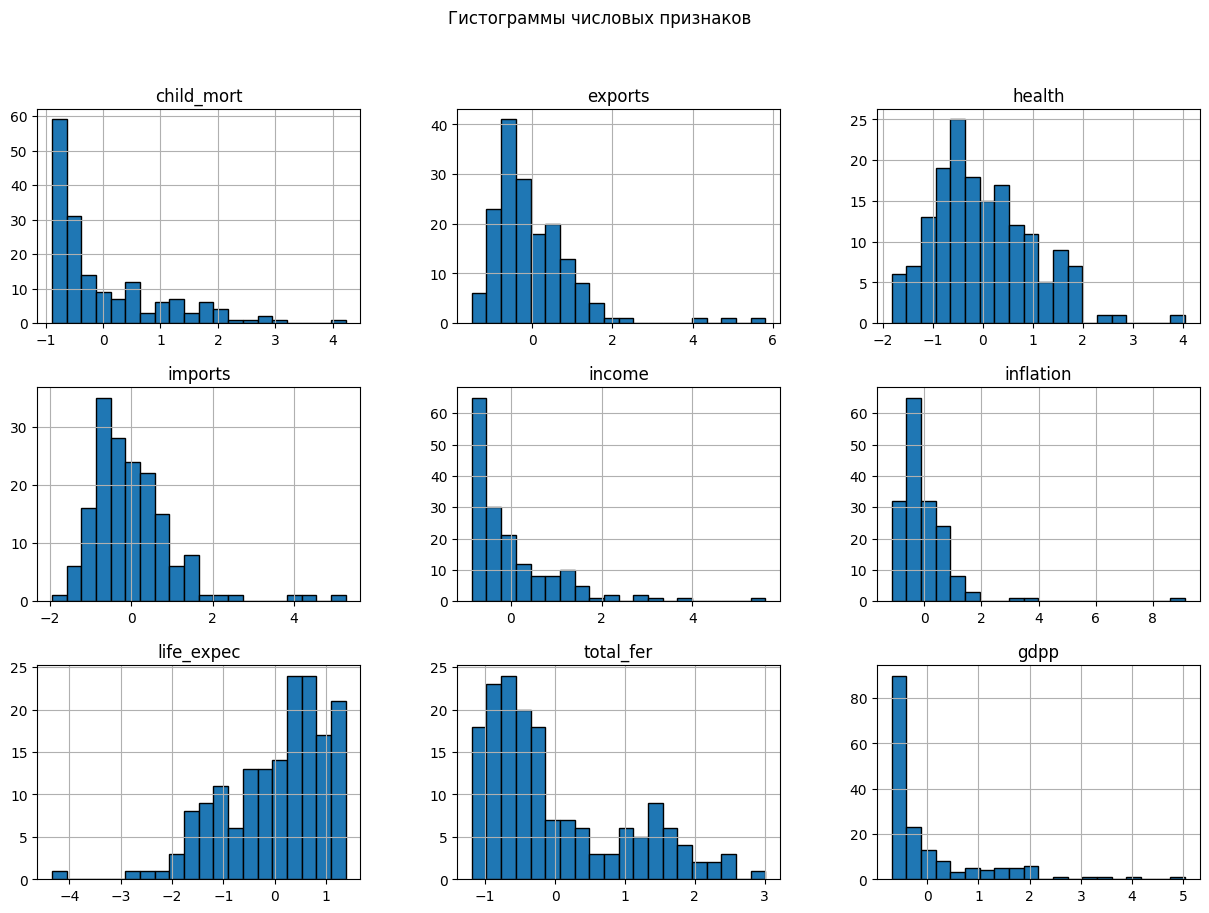

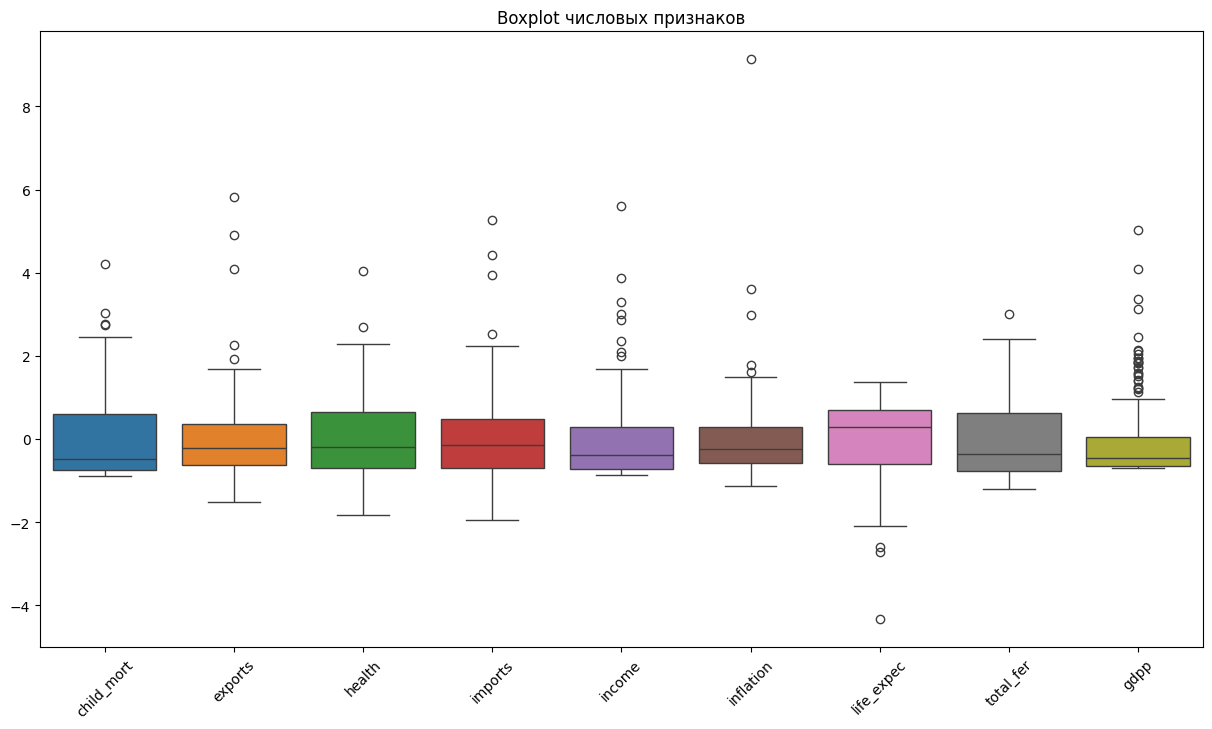

In [39]:
num_cols = ['child_mort', 'exports', 'health', 'imports', 'income',
            'inflation', 'life_expec', 'total_fer', 'gdpp']


data[num_cols].hist(figsize=(15,10), bins=20, edgecolor='black')
plt.suptitle("Гистограммы числовых признаков")
plt.show()


plt.figure(figsize=(15,8))
sns.boxplot(data=data[num_cols])
plt.title("Boxplot числовых признаков")
plt.xticks(rotation=45)
plt.show()


1) Пропусков нет

2) Дубликатов нет

3) Типы данных корректные:

Числовые: child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp

Категориальный: country (название страны)

**Вывод: данные чистые, удалять ничего не нужно.**

In [40]:
#заскалируем числовые колонки
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_kmeans,cluster_db
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2,1,0
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,3,0,0
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,3,0,0
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,3,1,-1
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,3,0,0


# **Иерархическая кластеризация**

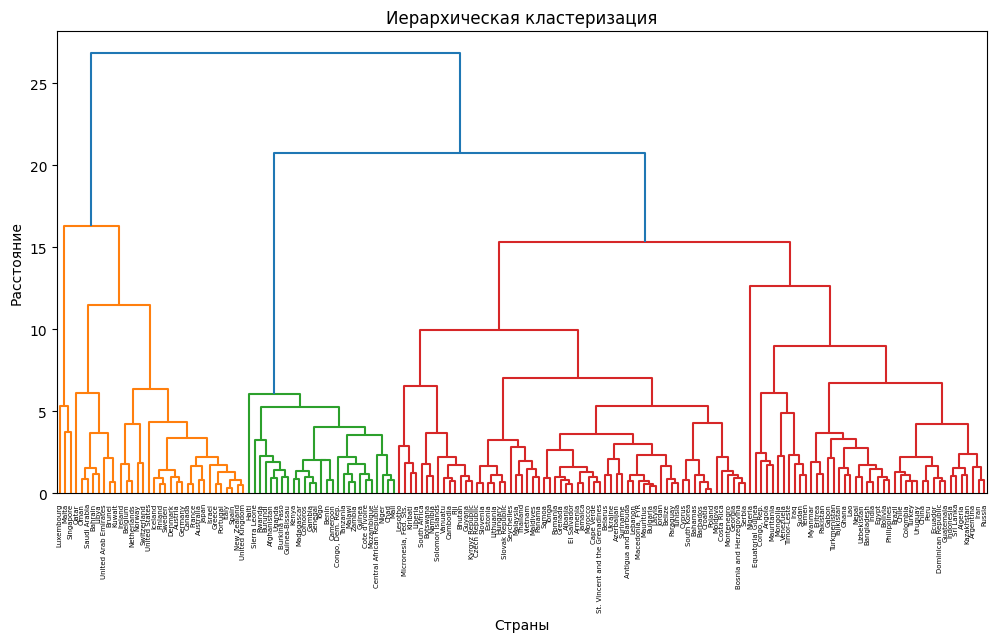

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

X = data[num_cols].values

# Построение дендрограммы
linked = linkage(X, method='ward')  #используем метод Уорда, который минимизирует внутрикластерную дисперсию

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=data['country'].values, leaf_rotation=90)
plt.title("Иерархическая кластеризация")
plt.xlabel("Страны")
plt.ylabel("Расстояние")
plt.show()


In [24]:
#берем 3 кластера
k_opt = 3
data['cluster'] = fcluster(linked, k_opt, criterion='maxclust')

#средние значения признаков по кластерам
data.groupby('cluster')[num_cols].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
1,-0.803529,0.636662,0.615456,0.083388,1.583930,-0.347882,1.063177,-0.701934,1.652996
2,1.661368,-0.641034,-0.112704,-0.299426,-0.809299,-0.060637,-1.500878,1.646940,-0.672893
3,-0.165443,-0.040930,-0.168703,0.049522,-0.301911,0.127030,0.041280,-0.194355,-0.358809


##Кластер 1:

1) child_mort = -0.80 → ниже среднего → меньше детской смертности

2) income = 1.58, gdpp = 1.65 → выше среднего → высокий доход и ВВП

3) life_expec = 1.06 → выше среднего → долгая ожидаемая жизнь
Всё это признаки развитых стран.

##Кластер 2:

1) child_mort = 1.66 → выше среднего → высокая детская смертность

2) income = -0.80, gdpp = -0.67 → ниже среднего → низкий доход и ВВП

3) life_expec = -1.50 → ниже среднего → короткая ожидаемая жизнь

4) total_fer = 1.64 → выше среднего → высокая рождаемость
Все эти признаки указывают на уязвимые страны, которым нужна помощь.

##Кластер 3:

почти все признаки имеют значения близкие к 0, например:

1) child_mort = -0.16 → чуть ниже среднего

2) income = -0.30 → чуть ниже среднего

3) gdpp = -0.35 → чуть ниже среднего

##Кластер 1 - развитые страны
##Кластер 2 - уязвимые страны
##Кластер 3 - средний уровень благосостояния, промежуточная группа

In [26]:
cluster_means = data.groupby('cluster')[num_cols].mean()
print("Средние значения признаков по кластерам:\n")
print(cluster_means)

#определяем кластер с наибольшей нуждой
#будем ориентироваться на высокую детскую смертность, низкий доход и низкую продолжительность жизни
priority_cluster = cluster_means['child_mort'].idxmax()
print(f"\nПриоритетный кластер для помощи: {priority_cluster}\n")

#список стран приоритетного кластера
priority_countries = data[data['cluster'] == priority_cluster]['country'].tolist()
print("Страны, нуждающиеся в помощи в первую очередь:\n")
print(priority_countries)

#эталонная страна каждого кластера (ближайшая к среднему по кластеру)
def find_representative_country(df, cluster, num_cols):
    cluster_data = df[df['cluster'] == cluster]
    cluster_mean = cluster_data[num_cols].mean().values
    distances = ((cluster_data[num_cols].values - cluster_mean)**2).sum(axis=1)
    idx_min = distances.argmin()
    return cluster_data.iloc[idx_min]['country']

print("\nЭталонная страна каждого кластера:")
for cl in sorted(data['cluster'].unique()):
    rep_country = find_representative_country(data, cl, num_cols)
    print(f"Кластер {cl}: {rep_country}")

Средние значения признаков по кластерам:

         child_mort   exports    health   imports    income  inflation  \
cluster                                                                  
1         -0.803529  0.636662  0.615456  0.083388  1.583930  -0.347882   
2          1.661368 -0.641034 -0.112704 -0.299426 -0.809299  -0.060637   
3         -0.165443 -0.040930 -0.168703  0.049522 -0.301911   0.127030   

         life_expec  total_fer      gdpp  
cluster                                   
1          1.063177  -0.701934  1.652996  
2         -1.500878   1.646940 -0.672893  
3          0.041280  -0.194355 -0.358809  

Приоритетный кластер для помощи: 2

Страны, нуждающиеся в помощи в первую очередь:

['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda', 'Senegal', 'Sierra 

# **K-means/mini batch k means**

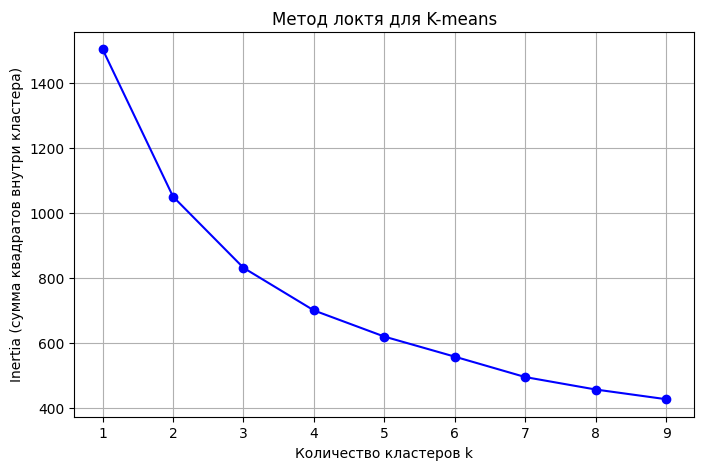

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Используем стандартизированные числовые данные
X_scaled = data[num_cols]

# Elbow Method для определения оптимального числа кластеров
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'o-', color='blue')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia (сумма квадратов внутри кластера)')
plt.title('Метод локтя для K-means')
plt.grid()
plt.show()


Выбириаем 2 кластера, тк после 2 точки резко меняется график

In [42]:
k_opt = 2
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
data['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

cluster_summary = data.groupby('cluster_kmeans')[num_cols].mean()
cluster_summary

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_kmeans,,,,,,,,,
0,-0.649334,0.274208,0.181973,0.092431,0.461621,-0.216177,0.669740,-0.667096,0.412823
1,0.945355,-0.399215,-0.264931,-0.134568,-0.672066,0.314728,-0.975062,0.971213,-0.601022


1) Кластер 0 объединяет страны с относительно высокими доходами, низкой детской смертностью и большей продолжительностью жизни — страны со средним или высоким уровнем благосостояния.
2) Кластер 1 включает страны с высокой детской смертностью, низким доходом и низкой продолжительностью жизни — наиболее нуждающиеся в международной помощи.

In [43]:
# определяем кластер с наибольшей нуждой
priority_cluster_kmeans = cluster_summary['child_mort'].idxmax()
print(f"\nПриоритетный кластер для помощи (K-means): {priority_cluster_kmeans}\n")

# список стран приоритетного кластера
priority_countries_kmeans = data[data['cluster_kmeans'] == priority_cluster_kmeans]['country'].tolist()
print("Страны, нуждающиеся в помощи в первую очередь (K-means):\n")
print(priority_countries_kmeans)

# эталонная страна каждого кластера
print("\nЭталонная страна каждого кластера (K-means):")
for cl in sorted(data['cluster_kmeans'].unique()):
    rep_country = find_representative_country(data, cl, num_cols, 'cluster_kmeans')
    print(f"Кластер {cl}: {rep_country}")


Приоритетный кластер для помощи (K-means): 1

Страны, нуждающиеся в помощи в первую очередь (K-means):

['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iraq', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Turkmenistan', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Yemen', 'Zambia']

Эталонная страна каждого кластера (K-means):
Кластер

# **DBSCAN**

In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters_db = dbscan.fit_predict(X_scaled)

data['cluster_db'] = clusters_db

cluster_summary = data[data['cluster_db'] != -1].groupby('cluster_db')[num_cols].mean()
print(cluster_summary)

print(data['cluster_db'].value_counts())

            child_mort  exports    health  imports    income  inflation  \
cluster_db                                                                
0            -0.119452 -0.12559 -0.031023 -0.10433 -0.104861  -0.136468   

            life_expec  total_fer      gdpp  
cluster_db                                   
0              0.10461  -0.086524 -0.080785  
cluster_db
 0    137
-1     30
Name: count, dtype: int64


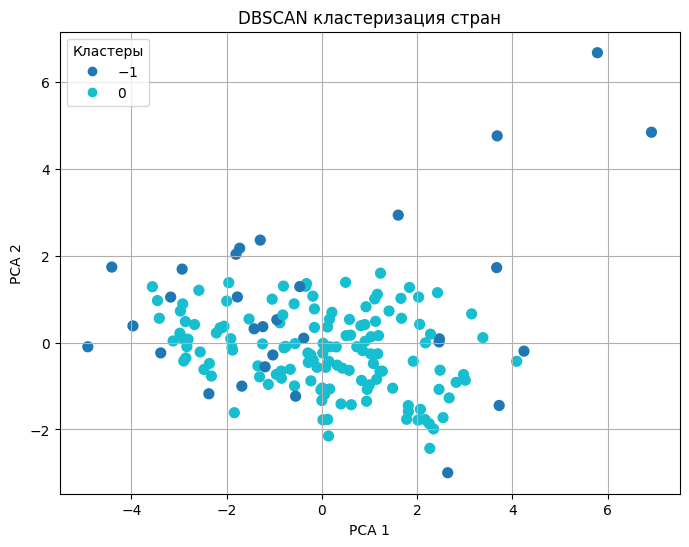

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Снижаем размерность до 2D для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=data['cluster_db'], cmap='tab10', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("DBSCAN кластеризация стран")
plt.legend(*scatter.legend_elements(), title="Кластеры")
plt.grid(True)
plt.show()


1. Основной кластер (0) содержит 137 стран. Их показатели близки к среднему по выборке (значения около нуля после стандартизации), то есть это страны со средним уровнем благосостояния, умеренной смертностью детей, средней продолжительностью жизни и экономическими показателями.

2. Выбросы (-1) — 30 стран, сильно отличаются по ключевым признакам: возможно, это либо крайне бедные страны с высокой смертностью детей, низкой продолжительностью жизни, низким доходом и ВВП на душу населения, либо очень богатые страны с противоположными показателями.

3. Таким образом, помощь в первую очередь стоит направить на страны из группы выбросов (-1), так как они находятся в наихудших условиях.

In [37]:
# Эталонные страны для каждого кластера
print("\nЭталонные страны по кластерам (DBSCAN):")
for cl in sorted(data['cluster_db'].unique()):
    if cl == -1:
        continue  # пропускаем шум
    rep_country = find_representative_country(data, cl, num_cols, 'cluster_db')
    print(f"Кластер {cl}: {rep_country}")

# Страны, не попавшие ни в один кластер (шум)
noise_countries = data[data['cluster_db'] == -1]['country'].tolist()
print("\nСтраны, не попавшие ни в один кластер (шум):")
print(noise_countries)


Эталонные страны по кластерам (DBSCAN):
Кластер 0: Suriname

Страны, не попавшие ни в один кластер (шум):
['Angola', 'Brunei', 'Central African Republic', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Equatorial Guinea', 'Gabon', 'Haiti', 'Iraq', 'Ireland', 'Kiribati', 'Kuwait', 'Lesotho', 'Liberia', 'Luxembourg', 'Malta', 'Micronesia, Fed. Sts.', 'Mongolia', 'Nigeria', 'Norway', 'Qatar', 'Rwanda', 'Seychelles', 'Sierra Leone', 'Singapore', 'South Africa', 'Timor-Leste', 'Turkmenistan', 'United States', 'Venezuela']


# **Оптимальное количество кластеров**

## Вывод по кластеризации стран

1. **Иерархическая кластеризация** (3 кластера):  
   - Кластер 2: высокие показатели детской смертности и рождаемости → страны, нуждающиеся в приоритетной помощи.  
   - Кластер 1: низкие показатели детской смертности, высокие доходы → относительно благополучные страны.  
   - Кластер 3: показатели около среднего → страны среднего уровня.

2. **K-Means** (2 кластера):  
   - Кластер 1: бедные страны с высокими проблемами здравоохранения и низким доходом → приоритет для помощи.  
   - Кластер 0: более благополучные страны.

3. **DBSCAN**:  
   - Основной кластер: средний уровень благосостояния.  
   - Выбросы (-1): страны с экстремально высокими показателями детской смертности или низким доходом → приоритетные для поддержки.


## **Каким странам нужно помогать в первую очередь**

## Вывод по кластеризации стран с помощью метода Иерархическая кластеризация

На основе проведённой иерархической кластеризации были выделены три кластера стран:

**Кластер 1 (высокий уровень благосостояния):**  
- Низкая детская смертность, высокий доход и продолжительность жизни, хорошие показатели здравоохранения.  
- Эталонная страна: **Iceland**  
- Пример стран: **Iceland, Norway, Switzerland**  

**Кластер 2 (приоритетный для помощи):**  
- Очень высокая детская смертность, низкий доход, низкая продолжительность жизни — страны с наибольшей нуждой.  
- Эталонная страна: **Burkina Faso**  
- Страны, которым следует оказывать помощь в первую очередь:  
`Afghanistan, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Côte d'Ivoire, Gambia, Guinea, Guinea-Bissau, Haiti, Kenya, Madagascar, Malawi, Mali, Mozambique, Niger, Rwanda, Senegal, Sierra Leone, Tanzania, Togo, Uganda, Zambia`  

**Кластер 3 (средний уровень благосостояния):**  
- Показатели близки к среднему по выборке, страны со средним уровнем дохода и социальной защиты.  
- Эталонная страна: **Suriname**  
- Пример стран: **Suriname, Brazil, Thailand**  

**Рекомендация:**  
Благотворительной организации следует сосредоточить усилия на странах кластера 2, начиная с эталонной страны (**Burkina Faso**) и далее распространяя поддержку на все страны этого кластера.


## Вывод по кластеризации K-means

Метод **K-means** разделил страны на два кластера:

**Кластер 0 (страны с высоким уровнем жизни):**  
- Характеризуются низкой детской смертностью, высоким доходом и продолжительностью жизни, стабильной экономикой.  
- Эталонная страна: **South Korea**  
- Примеры стран: **Germany, Norway, Canada, South Korea, Japan**

**Кластер 1 (страны, нуждающиеся в помощи):**  
- Высокая детская смертность, низкий доход, низкая продолжительность жизни, высокая рождаемость.  
- Эталонная страна: **Ghana**  
- Примеры стран: **Afghanistan, Niger, Mali, Mozambique, Uganda, Zambia**

**Рекомендация:**  
Помощь следует в первую очередь направить странам **кластера 1**, где наблюдаются наиболее неблагоприятные социально-экономические и демографические показатели.


## Вывод по кластеризации DBSCAN

Метод **DBSCAN** выделил один основной кластер и группу стран, которые не попали ни в один кластер (шум).

**Кластер 0 (страны со средним уровнем развития):**  
- Показатели близки к средним: умеренная детская смертность, средний доход, средняя продолжительность жизни.  
- Экономика относительно стабильная, без выраженного лидерства.  
- Эталонная страна: **Suriname**  
- Примеры стран: Argentina, Thailand, Morocco, Kazakhstan, Peru  

**Шум (страны, не попавшие в кластеры):**  
- Сильно отклоняются от остальных:  
  - Часть — очень развитые страны (Norway, Luxembourg, Singapore, United States)  
  - Часть — крайне бедные и нестабильные (Haiti, Nigeria, Sierra Leone, Congo (Dem. Rep.))  

**Рекомендация:**  
Помощь следует в первую очередь направить странам из группы шума с низкими доходами и высокой смертностью, таким как **Haiti, Nigeria, Sierra Leone, Congo (Dem. Rep.)**, поскольку именно они демонстрируют наибольшую социально-экономическую уязвимость.
